##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

In [129]:
import tensorflow as tf #import tensorflow machine learning library

In [130]:
import numpy as np

In [131]:
import csv


In [132]:
from pathlib import Path

In [133]:
contents = csv.DictReader(open(Path("./data1.csv"))) #reads in data

In [134]:
rssi_values = []
too_close_too_long = []
i = 0
for row in contents: #divides up data into  RSSI values and "too close for too long" values (1 = too close for too long, 0 is opposite)
  rssi_values += [float(row['RSSI'])]
  too_close_too_long += [int(row['Too Close for Too Long'])]

rssi_values = rssi_values[:2200]
rssi = np.array(rssi_values)
too_close = np.array(too_close_too_long[:2200]) # puts data into np arrays for neural network to use
print(rssi.shape) #debugging purposes
print(too_close.shape)


(2200,)
(2200,)


In [141]:
import tensorflow as tf

model = tf.keras.models.Sequential([ # This block of code creates the neural network with 2 dense layers
                                    
  tf.keras.layers.Dense(15, activation='relu', input_shape = (1,)),
  tf.keras.layers.Dense(2, activation='relu')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(rssi, too_close, epochs=10, batch_size=500) # fits and runs model, outputting accuracy values


Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 3/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 7/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 8/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5009


size  of x:  (2200,)
size  of y:  (2200,)


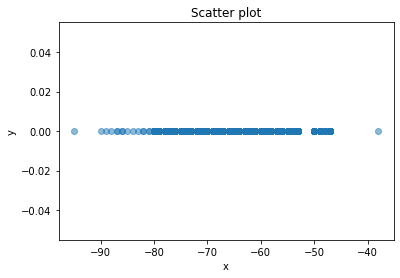

In [139]:
import matplotlib.pyplot as plt # some plotting stuff for debugging
# Plot
# colors = (255, 0, 0)
print('size  of x: ', np.argmax(model(rssi), axis=1).shape)
print('size  of y: ', too_close.shape)
plt.scatter(rssi, np.argmax(model(rssi), axis=1), alpha=0.5)

plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()